# Set-up

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


# Voting Classifiers

In [2]:
# data
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Hard voting

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [4]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [5]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


## Soft voting

In [6]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [7]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


# Bagging and Pasting

they differ with `bootstrap=True`(with replacement) for bagging and `bootstrap=False`(without replacement) for pasting

## Bagging

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


In [10]:
# versus one decision tree classifier only
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


## Pasting

In [11]:
bag_clf1 = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=False, random_state=42)
bag_clf1.fit(X_train, y_train)
y_pred1 = bag_clf1.predict(X_test)

In [12]:
print(accuracy_score(y_test, y_pred1))

0.912


# Random Patches and Random Subspaces

**Random Patches** <br>
- samples both training instances and features
  - `bootstrap=True` and `max_samples=n` <br> where n!=number of training instances or n!=1.0
  - `bootstrap_features=True`

  
**Random Subspaces** <br>
- samples only the features 
  - `bootstrap=False` and `max_features=1.0`
  - `bootstrap_features = True`

## Random Patches

In [13]:
rpatch_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, bootstrap_features=True, random_state=42)
rpatch_clf.fit(X_train, y_train)
y_pred_rpatch = rpatch_clf.predict(X_test)

In [14]:
print(accuracy_score(y_test, y_pred_rpatch))

0.912


## Random Subspaces

In [15]:
rsub_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=1.0, bootstrap=False, bootstrap_features=True, random_state=42)
rsub_clf.fit(X_train, y_train)
y_pred_rsub = rsub_clf.predict(X_test)

In [16]:
print(accuracy_score(y_test, y_pred_rsub))

0.824


# Random Forests

## Common Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

rforest_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
# n_jobs=-1 means that the computation will be dispatched on all the CPUs of the computer
rforest_clf.fit(X_train, y_train)
y_pred_rforest = rforest_clf.predict(X_test)

In [18]:
accuracy_score(y_test, y_pred_rforest)

0.912

## Extremely Randomized Trees or Extra-Trees

In [19]:
from sklearn.ensemble import ExtraTreesClassifier

xtrees_clf = ExtraTreesClassifier(n_estimators = 500, max_leaf_nodes=16, n_jobs=-1)
xtrees_clf.fit(X_train, y_train)
y_pred_xtrees = xtrees_clf.predict(X_test)

In [20]:
accuracy_score(y_test, y_pred_xtrees)

0.912

## Feature Importance

If we need to do Feature Selection, Random Forest is one of the ways to go.

In [21]:
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
  print(name, score)

sepal length (cm) 0.10879719105604406
sepal width (cm) 0.023328309269266743
petal length (cm) 0.42478411736048655
petal width (cm) 0.4430903823142026


shows that petal length and width are the most important features while sepal length and width are rather unimportant

# Boosting

## AdaBoost

In [22]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
  DecisionTreeClassifier(max_depth=1), n_estimators=200,
  algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

what just happened? let's look further

In [23]:
ada_clf.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=1, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=502073266, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=1, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1853399237, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=1, max_features=N

As we can see above, each estimator differs from the `random_state`

In [24]:
ada_clf.classes_

array([0, 1])

In [25]:
ada_clf.estimator_errors_

# used to compute the weights
# the range of these weights are quite concentrated

array([0.18133333, 0.27512937, 0.28334096, 0.35488317, 0.3171361 ,
       0.38272512, 0.35630662, 0.33148186, 0.40484099, 0.29959284,
       0.38482533, 0.37793452, 0.4396849 , 0.41956551, 0.41977426,
       0.42276892, 0.44540522, 0.4592429 , 0.43517238, 0.4795022 ,
       0.46538072, 0.48000343, 0.43464541, 0.44653579, 0.47534577,
       0.48382716, 0.45804523, 0.46674707, 0.4374261 , 0.48598125,
       0.48769271, 0.4722106 , 0.46346519, 0.46165373, 0.44202223,
       0.44509139, 0.47099366, 0.45066309, 0.4881181 , 0.47269775,
       0.47884803, 0.46937918, 0.4663008 , 0.44912872, 0.45639441,
       0.46252216, 0.48048523, 0.49000957, 0.4780251 , 0.45748808,
       0.47390931, 0.4836773 , 0.45432253, 0.4816146 , 0.49129336,
       0.48627751, 0.48533895, 0.48977843, 0.4781294 , 0.45990675,
       0.45628973, 0.45333756, 0.48145777, 0.47828933, 0.46468214,
       0.46348201, 0.47643265, 0.471952  , 0.45673327, 0.47977324,
       0.46875606, 0.46464402, 0.45684007, 0.46146966, 0.46037

In [26]:
ada_clf.estimator_weights_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [27]:
for estimator in ada_clf.estimators_:
    print(estimator.predict([[1, 1.2]]))

[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[1]
[1]
[0]
[1]
[0]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[0]
[1]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[1]
[0]
[1]
[0]
[1]
[1]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[1]
[0]
[1]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[0]
[1]
[1]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[1]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[1]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]


In [28]:
ada_clf.decision_function([[1, 1.2]])

# H(x)

array([-0.3254677])

In [29]:
ada_clf.predict([[1, 1.2]])

array([0])

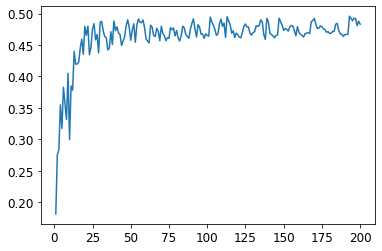

In [30]:
plt.plot(range(1,201), ada_clf.estimator_errors_.ravel())
plt.show()

this one's looking bad as the error rises
we can just lessen the estimators so it will stop early 

In [31]:
# ada_clf1 -- adjusted number of estimators
ada_clf1 = AdaBoostClassifier(
  DecisionTreeClassifier(max_depth=1), n_estimators=25,
  algorithm="SAMME.R", learning_rate=0.5)
ada_clf1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [32]:
ada_clf1.predict([[1, 1.2]])

array([0])

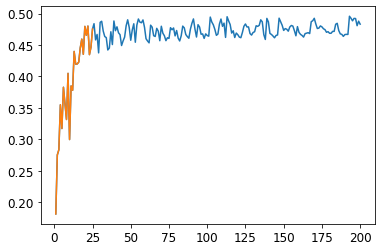

In [33]:
plt.plot(range(1,201), ada_clf.estimator_errors_.ravel())
plt.plot(range(1,26), ada_clf1.estimator_errors_.ravel())
plt.show()

let's see how they fare 

In [34]:
y_pred_ada0 = ada_clf.predict(X_test)
y_pred_ada1 = ada_clf1.predict(X_test)

In [35]:
accuracy_score(y_test, y_pred_ada0)

0.896

In [36]:
accuracy_score(y_test, y_pred_ada1)

0.904

## Gradient Boosting

### Step by Step

In [37]:
# data
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [38]:
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [39]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [40]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [41]:
y_pred = sum(tree.predict(X) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.04021166, 0.49995198, 0.17052257, 0.04021166, 0.29044761,
       0.29044761, 0.6679558 , 0.49995198, 0.04021166, 0.17052257,
       0.6679558 , 0.67888336, 0.49995198, 0.29044761, 0.29044761,
       0.29044761, 0.04021166, 0.04021166, 0.04021166, 0.04021166,
       0.04021166, 0.49484029, 0.04021166, 0.04021166, 0.04021166,
       0.17052257, 0.29044761, 0.04021166, 0.04021166, 0.6679558 ,
       0.04021166, 0.29044761, 0.6679558 , 0.49995198, 0.49995198,
       0.17052257, 0.04021166, 0.49484029, 0.04021166, 0.04021166,
       0.49484029, 0.04021166, 0.6679558 , 0.49995198, 0.29044761,
       0.04021166, 0.04021166, 0.04021166, 0.04021166, 0.29044761,
       0.49995198, 0.17052257, 0.49995198, 0.49995198, 0.04021166,
       0.49995198, 0.49484029, 0.29044761, 0.6679558 , 0.04021166,
       0.04021166, 0.29044761, 0.49995198, 0.04021166, 0.29044761,
       0.04021166, 0.29044761, 0.17052257, 0.49484029, 0.75026781,
       0.17052257, 0.29044761, 0.6679558 , 0.17052257, 0.17052

What just happened? Let's see closer

In [42]:
tree_reg1.predict(X)[:5]

array([0.12356613, 0.52856846, 0.12356613, 0.12356613, 0.12356613])

In [43]:
tree_reg2.predict(X)[:5]

array([-0.09039794,  0.03991297,  0.03991297, -0.09039794,  0.15983802])

In [44]:
tree_reg3.predict(X)[:5]

array([ 0.00704347, -0.06852946,  0.00704347,  0.00704347,  0.00704347])

In [45]:
sum(tree.predict(X) for tree in (tree_reg1, tree_reg2, tree_reg3))[:5]

array([0.04021166, 0.49995198, 0.17052257, 0.04021166, 0.29044761])

In [46]:
y[:5]

array([ 0.0515729 ,  0.59447979,  0.16605161, -0.07017796,  0.34398593])

### Shortcut -- GradientBoostingRegressor

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [48]:
gbrt.predict(X)[:5]

array([0.04021166, 0.49995198, 0.17052257, 0.04021166, 0.29044761])

### with Early Stopping

#### Early Stopping by training then picking 

In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1 # + 1 since indexing starts with 0

# train til that
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=85,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [50]:
min_error = np.min(errors)
min_error

0.0027426595994411397

In [51]:
bst_n_estimators

85

#### Early Stopping by having a minimum boundary 

i.e. if the error went up consecutively 5 times

In [60]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [61]:
gbrt.n_estimators

69

So this stopped at 69th estimator

### Use this instead -- XGBoost

#### Without early stopping

In [57]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)

[08:19:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


#### With early stopping

In [59]:
xgb_reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=5)
y_pred = xgb_reg.predict(X_val)

[08:20:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.275313
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:0.247499
[2]	validation_0-rmse:0.222947
[3]	validation_0-rmse:0.201049
[4]	validation_0-rmse:0.181641
[5]	validation_0-rmse:0.166735
[6]	validation_0-rmse:0.153621
[7]	validation_0-rmse:0.141686
[8]	validation_0-rmse:0.131314
[9]	validation_0-rmse:0.122047
[10]	validation_0-rmse:0.112234
[11]	validation_0-rmse:0.10366
[12]	validation_0-rmse:0.097232
[13]	validation_0-rmse:0.092018
[14]	validation_0-rmse:0.087123
[15]	validation_0-rmse:0.083105
[16]	validation_0-rmse:0.079681
[17]	validation_0-rmse:0.076621
[18]	validation_0-rmse:0.074141
[19]	validation_0-rmse:0.071896
[20]	validation_0-rmse:0.070115
[21]	validation_0-rmse:0.068281
[22]	validation_0-rmse:0.066894
[23]	validation_0-rmse:0.065783
[24]	validation_0-rmse:0.064704
[25]	validation_0-rm

# Stacking